# PART 1| DATA PROCESSING

### Importing essential libraries

In [2]:
# Uploading Files (xlxs and pdf)
from google.colab import files
uploaded = files.upload()


Saving bpp_churn_data.pdf to bpp_churn_data.pdf
Saving bpp_churn_data.xlsx to bpp_churn_data.xlsx


In [3]:
pip install pandas openpyxl tabula-py #Getting tabula-py via pip to read pdf and convert that into dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 80.2 MB/s eta 0:00:00


In [4]:
pip install JPype1 #Had some dependencies error while using tabula, these were related to JPype

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 5.5 MB/s eta 0:00:00


In [5]:
import pandas as pd   #Importing pandas to create dataframes and also importing read_pdf from tabula.
from tabula import read_pdf

### Creating dataframes/datasets using the libraries imported

In [6]:
excel_df = pd.read_excel('bpp_churn_data.xlsx') #Converting the excel table in a dataframe
pdf_df = read_pdf("bpp_churn_data.pdf", pages = "all", multiple_tables=False)[0]



In [7]:
pdf_df.head(90) #Printing few rows of the table to check if the dataframes have been made successfully.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4067-HLYQI,Female,0,No,No,33,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),70.40,2406.10,No
1,5124-EOGYE,Male,0,No,No,31,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,638.55,No
2,5057-RKGLH,Female,0,Yes,Yes,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.35,191.10,No
3,0292-WEGCH,Female,0,Yes,Yes,54,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,86.20,4524.05,No
4,8910-ICHIU,Female,0,No,No,46,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,No,One year,Yes,Credit card (automatic),95.65,4664.20,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,7794-JASDG,Male,0,No,No,1,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.75,50.75,No
86,7609-YBPXG,Male,0,No,No,54,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),87.10,4735.20,No
87,5519-TEEUH,Male,0,No,Yes,33,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.15,682.15,No
88,7856-GANIL,Male,1,Yes,No,45,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),98.70,4525.80,No


In [8]:
excel_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4374-YMUSQ,Male,0,No,No,34,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),116.25,3899.05,No
1,4513-CXYIX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Two year,Yes,Credit card (automatic),80.70,5676,No
2,3957-HHLMR,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,...,No,No,No,Yes,One year,No,Bank transfer (automatic),65.20,4543.15,No
3,7803-XOCCZ,Female,0,Yes,Yes,52,Yes,No,Fiber optic,Yes,...,Yes,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),84.05,4326.8,No
4,5736-YEJAX,Male,0,No,Yes,69,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),79.45,5502.55,No


### Merging the datasets from xlsx file and the pdf file.

In [9]:
#Performing an inner merge to see if both our datasets have any common rows
merged_inner = pd.merge(excel_df, pdf_df, on='customerID', how='inner')

In [10]:
merged_inner.head() #Checking our inner merged dataframe

,customerID,gender_x,SeniorCitizen_x,Partner_x,Dependents_x,tenure_x,PhoneService_x,MultipleLines_x,InternetService_x,OnlineSecurity_x,...,DeviceProtection_y,TechSupport_y,StreamingTV_y,StreamingMovies_y,Contract_y,PaperlessBilling_y,PaymentMethod_y,MonthlyCharges_y,TotalCharges_y,Churn_y


### Since there are now such rows found, this means that both our dataframes have no intersection.
### After analysis we can see that the pdf and xlsx file both have the exact same columns and no such intersecting rows. We can merge them by stacking both the datasets "Vertically". This can be acheived by using the concat method shown below

In [11]:
merged_df = pd.concat([pdf_df,excel_df]) #Concatenating(Vertically stacking)
merged_df.shape # Calculating the number of rows and columns

(6543, 21)

# Part 2 | DATA CLEANING

## 2.1 | Looking for missing values

In [12]:
missing_values = merged_df.isnull().sum()
print(missing_values)
rows_with_missing = merged_df[merged_df.isnull().any(axis=1)]
print(rows_with_missing)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
Churn               0
dtype: int64
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
1270  4075-WKNIU  Female              0     Yes        Yes       0   
1354  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
1270          Yes           Yes             DSL             No  ...   
1354          Yes           Yes             DSL            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies  Contract  \
1270              Yes    

### Since there are 2 missing values(Total Charges). We now have to decide if we want to remove the entire row or impute them.
### Since 2 values is a very small portion of our dataset and both of the rows display a tenure of 0, therefore it is acceptable that we drop these 2 rows.

In [13]:
merged_df.dropna(inplace=True) #Dropping the rows with null values.
merged_df.isnull().sum() #Checking if these rows were dropped.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Therefore we have successfully handles the missing values in our dataset.

## 2.2 | Checking Duplicates

### We will now check if any customer is repeated in our dataset, therefore checking if any customer ID has duplicates.

In [14]:
merged_df.shape #For checking the number of rows

(6541, 21)

In [15]:
duplicate_customers = merged_df[merged_df.duplicated(subset='customerID', keep=False)] #Checking for duplicates of Customer ID
print(duplicate_customers)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


### We can clearly see that there an no duplicates of Customer ID.

## 2.3 | Data Type Conversion

In [16]:
datatype = merged_df.dtypes #Printing the datatype of every column in our dataset.
print(datatype)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


### I will convert my TotalCharges's datatype from object to a float. This would be used later on.

In [17]:
merged_df['TotalCharges'] = pd.to_numeric(merged_df['TotalCharges'], errors='coerce')
# The errors='coerce' is used to convert invalid inputs into NaN

In [18]:
datatype = merged_df.dtypes #Checking if the dataframe now has Total Charges's datatype set to float.
print(datatype)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


### We can also convert many things to boolean here, such as Senior Citizens, Partners and Dependents but will do that if needed later on.

## 2.4 | Identifying Outliers

### We will do this by taking our mean as reference.

In [19]:
from scipy import stats #Importing stats

In [20]:
# Calculate z-scores for MonthlyCharges and TotalCharges
merged_df['MonthlyCharges_zscore'] = stats.zscore(merged_df['MonthlyCharges'])
merged_df['TotalCharges_zscore'] = stats.zscore(merged_df['TotalCharges'])

#any data point that is more than 3 standard deviations away from the mean (in either direction) is considered an outlier.
zscore_threshold = 3

# Identyfying outliers
outliers_monthly_charges = merged_df[abs(merged_df['MonthlyCharges_zscore']) > zscore_threshold]
outliers_total_charges = merged_df[abs(merged_df['TotalCharges_zscore']) > zscore_threshold]

print(outliers_monthly_charges)
print(outliers_total_charges)


Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, MonthlyCharges_zscore, TotalCharges_zscore]
Index: []

[0 rows x 23 columns]
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, MonthlyCharges_zscore, TotalCharges_zscore]
Index: []

[0 rows x 23 columns]


### Therefore we can see there are no outliers based on MonthlyCharges and TotalCharges( No values beyond 3 standard deviations)

# Part 3 | Exploratory data analysis (EDA) on the churn data

## 3.1 | Importing Visualisation Libraries and analysing demographics

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

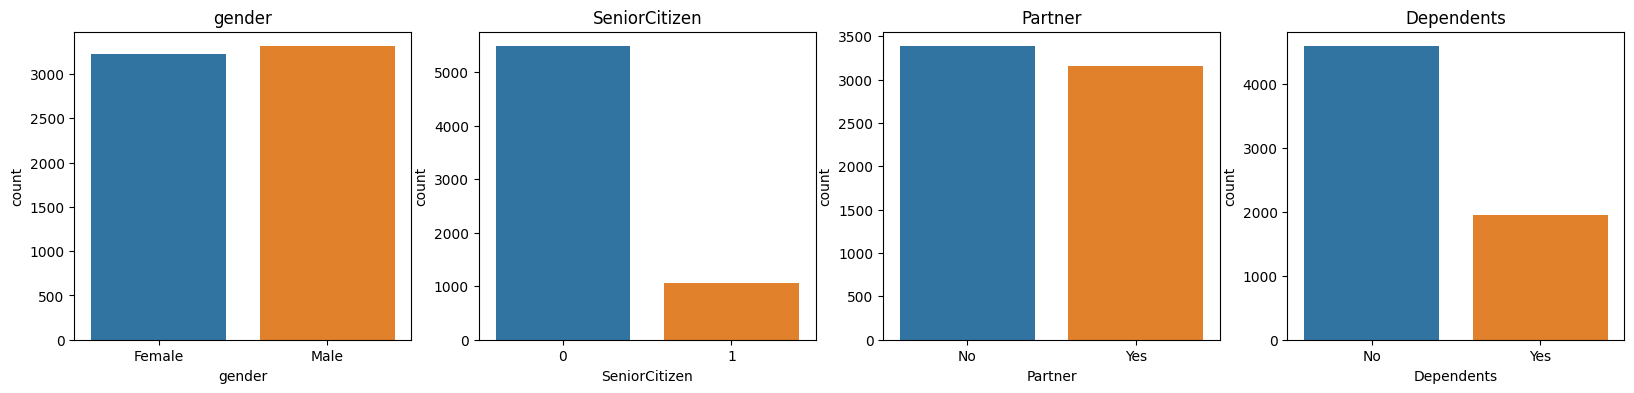

In [22]:
cols = ['gender','SeniorCitizen',"Partner","Dependents"]
numerical = cols

plt.figure(figsize=(20,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=merged_df)
    ax.set_title(f"{col}")

### We can see that most of the customers are younger citizens who do not have a dependent. Whereas the gender and partner proportions are almost the same.

### Now we will look at the relationship between MonthlyCharges and Churn to see if there is any correlation between them.

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

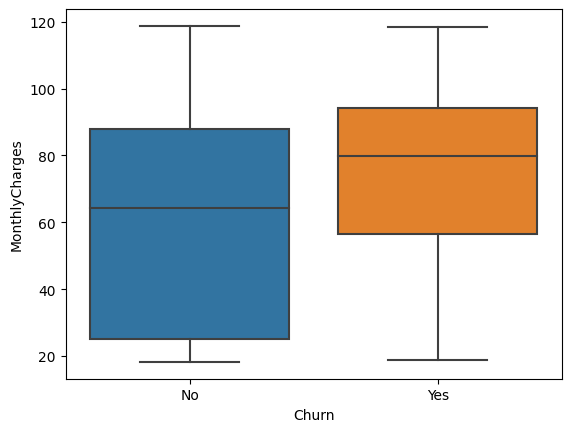

In [23]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=merged_df) # Using the seaborn library to create a boxplot

### We can clearly see here that people who stopped using the service tend to have a higher typical monthly charge compared to those who continued using it.

## 3.2 | Senior Citizens and Churn

In [24]:
#It is very important to split the data into train and test sets now as this ensures a clear seperation between
# the 2 phases, explainatory analysis and modelling. Also it prevents biases or leakages which inturn could affect
# the model's performance.

#Importing train_test_split to do such seperations
from sklearn.model_selection import train_test_split

In [25]:
senior_citizens = merged_df[merged_df['SeniorCitizen'] == 1]
#print(senior_citizens)
X_senior = senior_citizens.drop('Churn', axis=1)
y_senior = senior_citizens['Churn']
print(y_senior)

9       Yes
11      Yes
12       No
18       No
19       No
       ... 
4841    Yes
4859    Yes
4868    Yes
4872     No
4890    Yes
Name: Churn, Length: 1058, dtype: object


In [26]:

# Print columns in X_senior (features for senior citizens)
print("Columns in X_senior (features for senior citizens):")
print(X_senior.columns)

# Calculate churn rate for senior citizens
senior_citizens_churn_rate = (y_senior.value_counts() / len(y_senior)) * 100
print("\nChurn Rate for Senior Citizens:")
print(senior_citizens_churn_rate)

Columns in X_senior (features for senior citizens):
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'MonthlyCharges_zscore', 'TotalCharges_zscore'],
      dtype='object')

Churn Rate for Senior Citizens:
No     57.844991
Yes    42.155009
Name: Churn, dtype: float64


### This shows that about 57.84% of Seniors have not churned while 42.16% have.

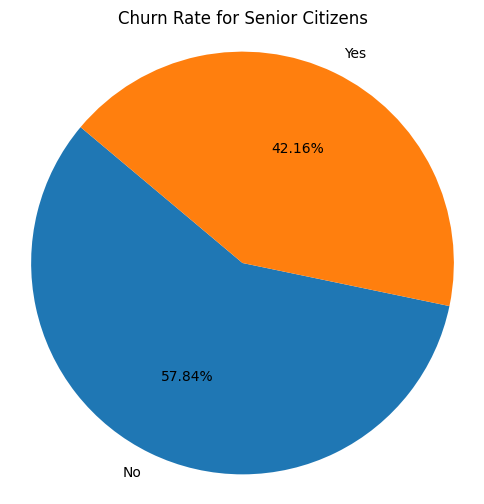

In [27]:
churn_labels = ['No', 'Yes']
churn_values = [57.844991, 42.155009]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_values, labels=churn_labels, autopct='%1.2f%%', startangle=140)
plt.title('Churn Rate for Senior Citizens')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## 3.3 | Tenure and Churn

In [28]:
churned_customers = merged_df[merged_df['Churn'] == 'Yes']
non_churned_customers = merged_df[merged_df['Churn'] == 'No']

# Calculate average tenure for churned and non-churned customers
avg_tenure_churned = churned_customers['tenure'].mean()
avg_tenure_non_churned = non_churned_customers['tenure'].mean()

print(f"Average tenure for churned customers: {avg_tenure_churned:.2f} months")
print(f"Average tenure for non-churned customers: {avg_tenure_non_churned:.2f} months")

Average tenure for churned customers: 18.15 months
Average tenure for non-churned customers: 37.64 months


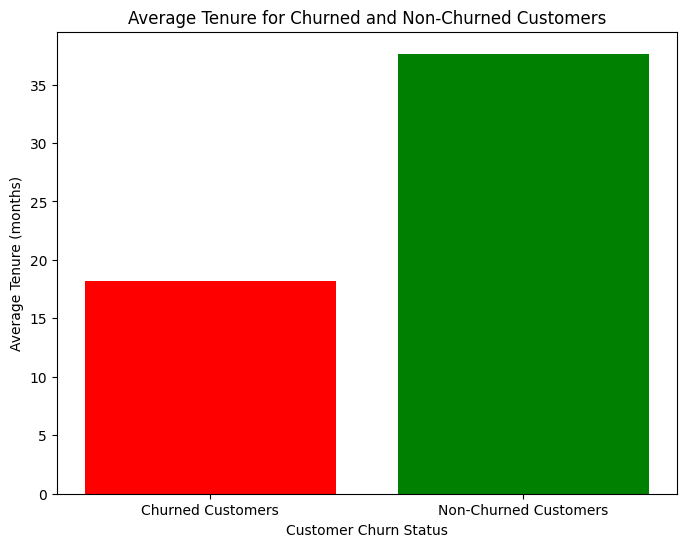

In [29]:
# Plotting Results

labels = ['Churned Customers', 'Non-Churned Customers']
values = [avg_tenure_churned, avg_tenure_non_churned]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['red', 'green'])
plt.xlabel('Customer Churn Status')
plt.ylabel('Average Tenure (months)')
plt.title('Average Tenure for Churned and Non-Churned Customers')
plt.show()

## 3.4 | Internet Service and Churn

In [30]:
churn_by_internet_service = merged_df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack() * 100
print(churn_by_internet_service)

Churn                   No        Yes
InternetService                      
DSL              81.088314  18.911686
Fiber optic      57.790171  42.209829
No               92.587413   7.412587


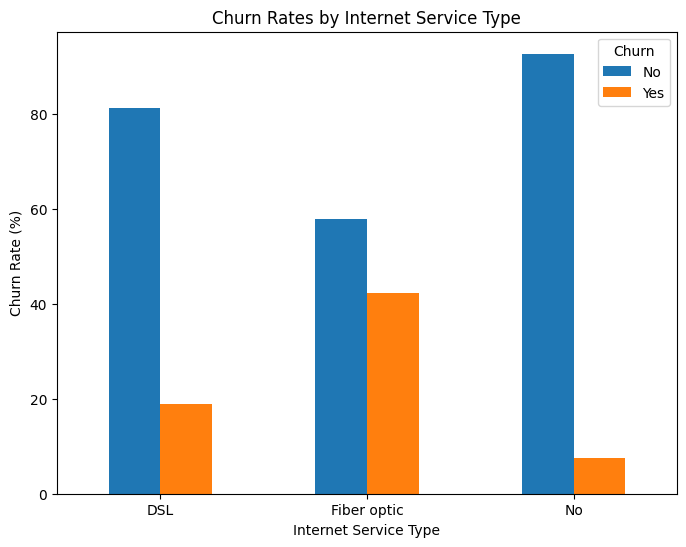

In [31]:
#Plotting this

churn_by_internet_service.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rates by Internet Service Type')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=0)
plt.show()

## 3.5 | Additional Services and Churn

In [32]:
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

# Calculate churn rates for customers with and without each service
for service in services:
    churn_by_service = merged_df.groupby(service)['Churn'].value_counts(normalize=True).unstack() * 100
print(churn_by_service)

Churn                       No        Yes
TechSupport                              
No                   58.377370  41.622630
No internet service  92.587413   7.412587
Yes                  84.371700  15.628300


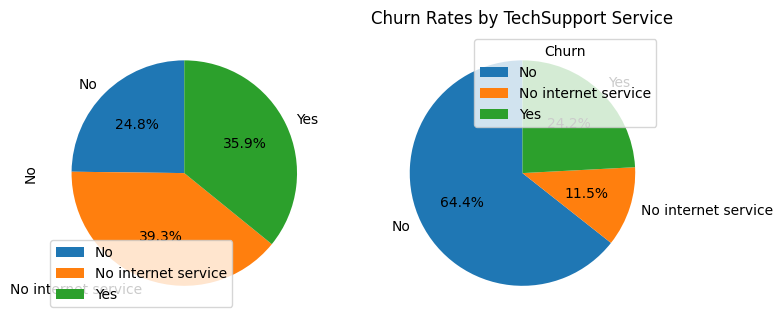

In [33]:
churn_by_service.plot.pie(subplots=True, figsize=(8, 6), autopct='%1.1f%%', startangle=90)
plt.title(f'Churn Rates by {service} Service')
plt.ylabel('')  # Remove the 'Churn' label on y-axis
plt.legend(title='Churn', loc='upper right')
plt.show()

## 3.6 | Contract Type and Churn

In [34]:
churn_by_contract = merged_df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
print(churn_by_contract)

Churn                  No        Yes
Contract                            
Month-to-month  57.266147  42.733853
One year        88.273853  11.726147
Two year        97.144670   2.855330


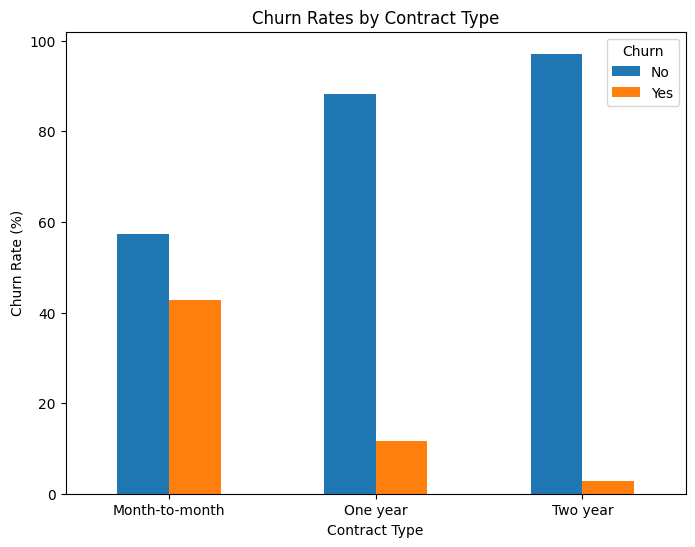

In [35]:
#Plotting
churn_by_contract.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rates by Contract Type')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=0)
plt.show()

## 3.7 | Payment Method and Churn

In [36]:
churn_by_payment_method = merged_df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack() * 100
print(churn_by_payment_method)

Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.426966  16.573034
Credit card (automatic)    84.539705  15.460295
Electronic check           54.483386  45.516614
Mailed check               80.961924  19.038076


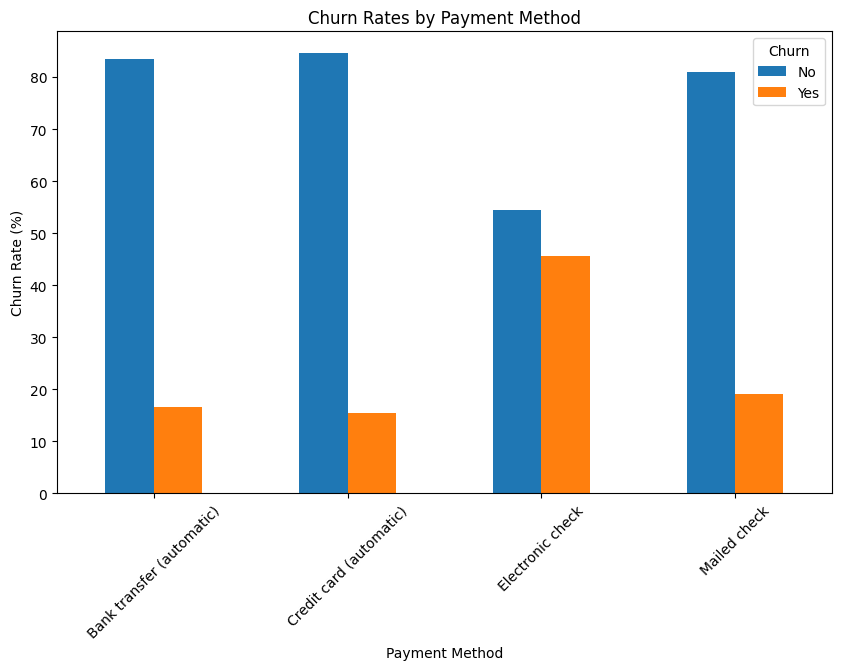

Churn rate for automatic payment methods:
No     83.98314
Yes    16.01686
Name: Churn, dtype: float64
Churn rate for non-automatic payment methods:
No     65.21386
Yes    34.78614
Name: Churn, dtype: float64


In [37]:
# Plotting bar chart for churn rates by payment method
churn_by_payment_method.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rates by Payment Method')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=45)
plt.show()

# Compare churn rates for automatic and non-automatic payment methods
automatic_payment_methods = ['Bank transfer (automatic)', 'Credit card (automatic)']
non_automatic_payment_methods = ['Electronic check', 'Mailed check']

automatic_churn_rate = merged_df[merged_df['PaymentMethod'].isin(automatic_payment_methods)]['Churn'].value_counts(normalize=True) * 100
non_automatic_churn_rate = merged_df[merged_df['PaymentMethod'].isin(non_automatic_payment_methods)]['Churn'].value_counts(normalize=True) * 100

print(f'Churn rate for automatic payment methods:\n{automatic_churn_rate}')
print(f'Churn rate for non-automatic payment methods:\n{non_automatic_churn_rate}')

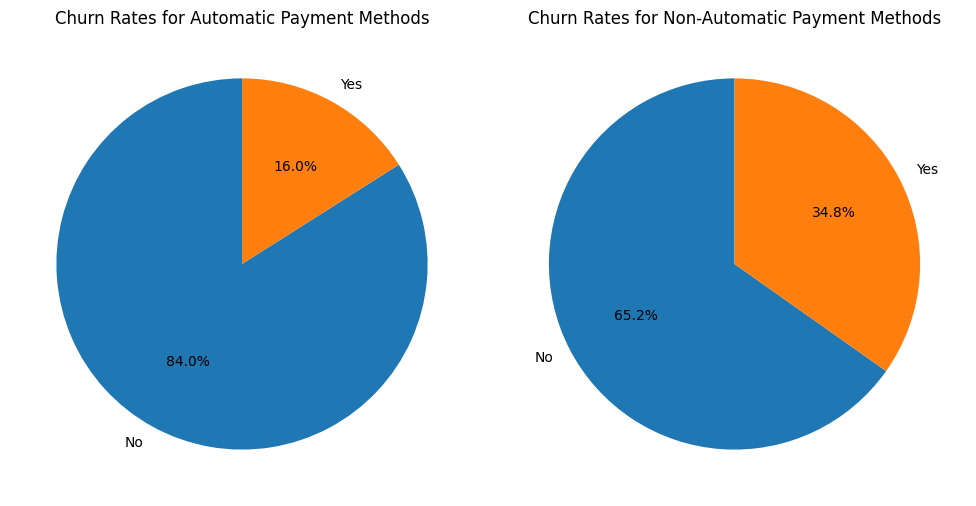

In [38]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
automatic_churn_rate.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Churn Rates for Automatic Payment Methods')
plt.ylabel('')  # Remove y-label

# Plotting pie chart for churn rates of non-automatic payment methods
plt.subplot(1, 2, 2)
non_automatic_churn_rate.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Churn Rates for Non-Automatic Payment Methods')
plt.ylabel('')  # Remove y-label

plt.tight_layout()
plt.show()

# PART 4 | BUILDING A CHURN PREDICTION MODEL

## 4.1 | Encoding Data

In [39]:
from sklearn.preprocessing import LabelEncoder #Importing Label Encoder


In [40]:
categorical_columns = merged_df.select_dtypes(include='object').columns

label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column using apply function
merged_df[categorical_columns] = merged_df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

# Display the transformed DataFrame
merged_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_zscore,TotalCharges_zscore
0,2659,0,0,0,0,33,1,0,1,0,...,0,0,0,1,0,70.40,2406.10,0,0.190219,NaN
1,3355,1,0,0,0,31,1,0,2,1,...,1,1,2,0,3,20.45,638.55,0,-1.467438,NaN
2,3317,0,0,1,1,9,1,0,2,1,...,1,1,2,0,3,20.35,191.10,0,-1.470757,NaN
3,161,0,0,1,1,54,1,2,0,0,...,2,2,0,1,2,86.20,4524.05,0,0.714563,NaN
4,5848,0,0,0,0,46,1,0,1,2,...,2,0,1,1,1,95.65,4664.20,0,1.028174,NaN


### Now to compute correlations between all the different numerical columns we can use the corr() method.

In [41]:
corr = merged_df.corr()
corr.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_zscore,TotalCharges_zscore
customerID,1.000000,0.007101,0.007435,-0.021742,-0.015956,0.005684,0.000741,0.007090,-0.012646,0.013514,...,-0.007542,-0.017401,0.012500,0.000877,0.014463,-0.000909,-0.000870,-0.012163,-0.000909,NaN
gender,0.007101,1.000000,-0.000592,0.001504,0.012440,0.003134,-0.006774,-0.011482,0.000891,-0.009206,...,-0.005163,-0.012134,-0.004478,-0.008739,0.015942,-0.017144,-0.003852,-0.009372,-0.017144,NaN
SeniorCitizen,0.007435,-0.000592,1.000000,0.014985,-0.212088,0.020580,0.014691,0.152737,-0.027904,-0.131866,...,0.033690,0.047836,-0.137404,0.159801,-0.041387,0.225886,0.108341,0.154440,0.225886,NaN
Partner,-0.021742,0.001504,0.014985,1.000000,0.452844,0.383087,0.018511,0.144293,0.000894,0.152522,...,0.135326,0.131306,0.300403,-0.015278,-0.158435,0.098093,0.321556,-0.152172,0.098093,NaN
Dependents,-0.015956,0.012440,-0.212088,0.452844,1.000000,0.160970,-0.005547,-0.027100,0.046720,0.150180,...,0.040508,0.017386,0.242707,-0.111207,-0.047360,-0.120344,0.060648,-0.163719,-0.120344,NaN


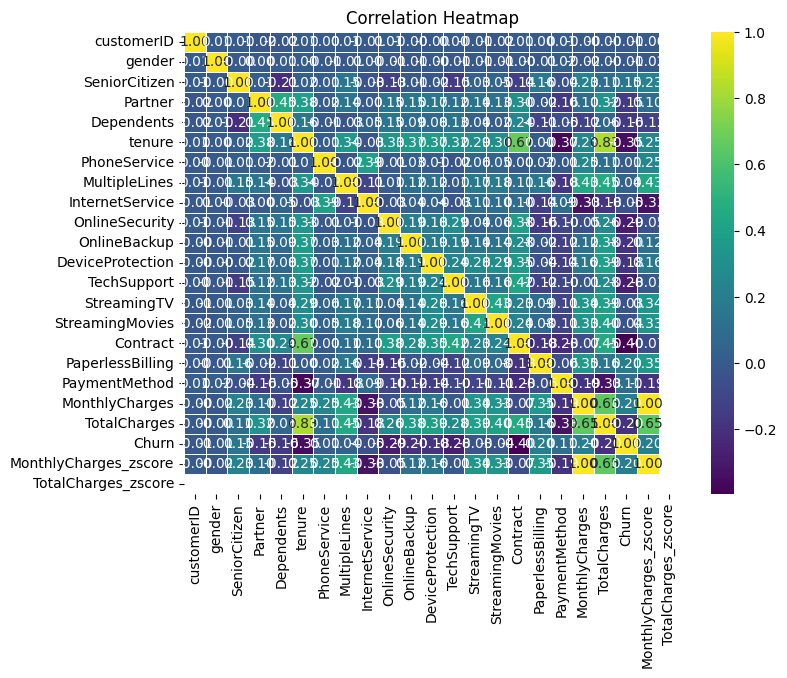

In [42]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr, cmap='viridis', annot=True, fmt='.2f', linewidths=0.5)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap')# Set title and display the heatmap
plt.show()

## 4.2 | Splitting data into Train and Test

In [43]:
#Creating two distinct sets from the dataset: one for training the model and another for testing its accuracy.
#About 80% of the data is used for training, while the remaining 20% is kept aside to evaluate the model's performance.

X = merged_df.drop('Churn', axis =1) #Assuming 'Churn' is the target column
y = merged_df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
print ('Total Entries:', len(merged_df))

print('\nTraining Entries:', len(X_train))

print('\nTest Entries:', len(y_test))

Total Entries: 6541

Training Entries: 5232

Test Entries: 1309


## 4.3 | Making Linear Model

In [45]:
#Importing Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
missing_values = merged_df.isnull().sum()
missing_values

customerID                  0
gender                      0
SeniorCitizen               0
Partner                     0
Dependents                  0
tenure                      0
PhoneService                0
MultipleLines               0
InternetService             0
OnlineSecurity              0
OnlineBackup                0
DeviceProtection            0
TechSupport                 0
StreamingTV                 0
StreamingMovies             0
Contract                    0
PaperlessBilling            0
PaymentMethod               0
MonthlyCharges              0
TotalCharges                8
Churn                       0
MonthlyCharges_zscore       0
TotalCharges_zscore      6541
dtype: int64

In [47]:
missing_total_charges = merged_df[merged_df['TotalCharges'].isnull()]
print(missing_total_charges)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
253         2033       1              0        0           1       0   
436         3769       0              0        1           1       0   
582         2842       1              0        1           1       0   
840          876       0              0        1           1       0   
2831        5036       1              0        1           1       0   
3326        2100       1              0        1           1       0   
3880        1620       0              0        1           1       0   
4718        1895       1              0        1           1       0   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
253              1              0                2               1  ...   
436              1              0                0               2  ...   
582              1              2                2               1  ...   
840              0              1                0 

### Will remove these rows with tenure=0 as it is leading to TotalCharges being NaN

In [51]:
#merged_df.dropna(subset=['TotalCharges'], inplace=True)
#X_train.head()
#X = merged_df.drop('Churn', axis =1) #Assuming 'Churn' is the target column
#y = merged_df['Churn']
#X_train.drop(columns=['TotalCharges_zscore'],inplace=True)
#X_train.drop(columns=['MonthlyCharges_zscore'],inplace=True)
#y_train.head()
merged_df.dropna(subset=['TotalCharges'], inplace=True)
merged_df.drop(columns=['TotalCharges_zscore'],inplace=True)
merged_df.drop(columns=['MonthlyCharges_zscore'],inplace=True)
X = merged_df.drop('Churn', axis=1)  # Assuming 'Churn' is the target column
y = merged_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [52]:
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [53]:
predictions = model.predict(X_test)


### Evaluating Model performance

In [54]:
predictions = predictions.astype(int)

In [55]:
predict_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

In [56]:
predict_df

,Actual,Predicted
4357,0,0
1549,0,0
81,1,0
2762,1,0
3196,1,0
...,...,...
2290,1,0
2025,0,0
430,0,0
704,0,0


In [57]:
correct_predictions = predict_df[predict_df['Actual'] == predict_df['Predicted']] #Calculating how many times model predicted correctly
num_correct_predictions = len(correct_predictions)
print("Number of correct predictions:", num_correct_predictions)

Number of correct predictions: 978


### By Linear Regression 978 predictions were made correctly out of 1307 entries. Therefore a 74.827% prediction rate.
### Though I tested my dataset using Linear Regression at the very first(as an experiment) but it might not be the best choice for classification tasks like churn prediction since it's designed for regression problems. Therefore I'll make a Logistic regression model as it works well if the relationship between the features and the target isn't very complex

## 4.4 | Logistic Regression

In [59]:
# Importing Important Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.80


In [60]:
# Other evaluation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.88      0.87       978
           1       0.62      0.58      0.60       329

    accuracy                           0.80      1307
   macro avg       0.74      0.73      0.74      1307
weighted avg       0.80      0.80      0.80      1307

[[861 117]
 [138 191]]


### We can see that the accuracy this time was about 80%, therefore the model made better predictions than Linear Regression. (which was the expected behaviour). Will make a Decision Tree model now as it is a powerful model for classification tasks such as Churn Prediction.

## 4.5 | Decision Tree Model

In [61]:
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)


In [62]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree:", accuracy_dt)

# Classification report
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_dt)

Accuracy of Decision Tree: 0.7528691660290742
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       978
           1       0.51      0.48      0.49       329

    accuracy                           0.75      1307
   macro avg       0.67      0.66      0.66      1307
weighted avg       0.75      0.75      0.75      1307

Confusion Matrix for Decision Tree:
[[827 151]
 [172 157]]


### The Decision Tree also showed an accuracy of about 76%, surprisingly about 4% less than the logistics regression.

# Data Science is Fun :)